# Statistical Analysis of the Subsetted Sentencing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sen = pd.read_csv('Sentencing_Data_v2.csv').iloc[:,1:]
sen.head()

,OFFENSE_CATEGORY,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_DISPOSITION,CHARGE_COUNT,ARREST_DATE,SENTENCE_DATE,RACE,GENDER,COMMITMENT_TYPE,COMMITMENT_TERM,UPDATED_OFFENSE_CATEGORY
0,UUW - Unlawful Use of Weapon,AGG UNLAWFUL USE OF WEAPON/VEH,Guilty,2,6/30/2007 4:30:00 AM,11/5/2014 12:00:00 AM,Hispanic,Male,Probation,2.00,UUW - Unlawful Use of Weapon
1,Aggravated Battery,DOMESTIC BATTERY/BODILY HARM/2ND+,Guilty,24,11/26/2008 12:00:00 AM,1/13/2011 12:00:00 AM,Black,Male,Illinois Department of Corrections,9.25,Domestic Battery
2,Aggravated Battery,AGG BATTERY/WEAPON/NO FIREARM,Guilty,23,11/26/2008 12:00:00 AM,1/13/2011 12:00:00 AM,Black,Male,Illinois Department of Corrections,9.25,Domestic Battery
3,Aggravated Battery,MURDER/INTENT TO KILL/INJURE,Guilty,5,9/3/2007 3:45:00 AM,5/16/2016 12:00:00 AM,Black,Male,Illinois Department of Corrections,52.86,Homicide
4,Aggravated Battery,MURDER/INTENT TO KILL/INJURE,Guilty,6,9/3/2007 3:45:00 AM,5/16/2016 12:00:00 AM,Black,Male,Illinois Department of Corrections,52.86,Homicide


In [3]:
# The target that we are trying to analyze is the number of years an individual goes to jail
target = sen['COMMITMENT_TERM']

Dropping the following columns from the data set: 'DISPOSITION_CHARGED_OFFENSE_TITLE','ARREST_DATE','SENTENCE_DATE', 'COMMITMENT_TYPE', and 'UPDATED_OFFENSE_CATEGORY.'

In [4]:
sentence = sen.loc[:,['OFFENSE_CATEGORY','CHARGE_DISPOSITION','CHARGE_COUNT',
                       'RACE', 'GENDER', 'COMMITMENT_TERM']]
sentence.head()

,OFFENSE_CATEGORY,CHARGE_DISPOSITION,CHARGE_COUNT,RACE,GENDER,COMMITMENT_TERM
0,UUW - Unlawful Use of Weapon,Guilty,2,Hispanic,Male,2.00
1,Aggravated Battery,Guilty,24,Black,Male,9.25
2,Aggravated Battery,Guilty,23,Black,Male,9.25
3,Aggravated Battery,Guilty,5,Black,Male,52.86
4,Aggravated Battery,Guilty,6,Black,Male,52.86


Text(0.5, 1.0, 'Histogram of Offense Categories')

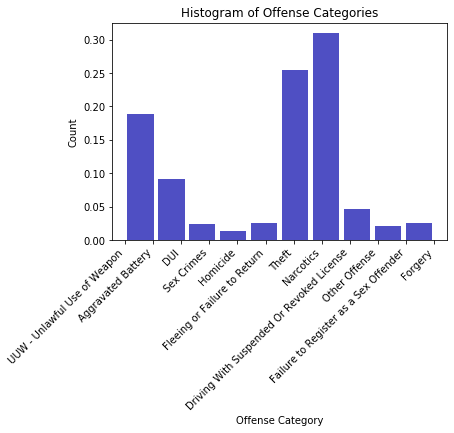

In [5]:
plt.hist(x = sentence['OFFENSE_CATEGORY'] ,color= '#0504aa', alpha=0.7, rwidth=0.85,
        weights=np.ones(len(sentence['OFFENSE_CATEGORY'])) / len(sentence['OFFENSE_CATEGORY']))
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Offense Category')
plt.ylabel('Count')
plt.title('Histogram of Offense Categories')

Text(0.5, 1.0, 'Histogram of Charge Disposition')

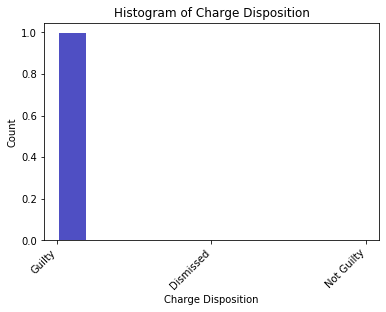

In [6]:
sentence.replace(r'^\s*$', np.nan, regex = True)
sentence['CHARGE_DISPOSITION'] = sentence.CHARGE_DISPOSITION.replace(np.nan,'Guilty')

plt.hist(x = sentence['CHARGE_DISPOSITION'] ,color= '#0504aa', alpha=0.7, rwidth=0.85,
        weights=np.ones(len(sentence['CHARGE_DISPOSITION'])) / len(sentence['CHARGE_DISPOSITION']))
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Charge Disposition')
plt.ylabel('Count')
plt.title('Histogram of Charge Disposition')

Text(0.5, 1.0, 'Histogram of Race Breakdown')

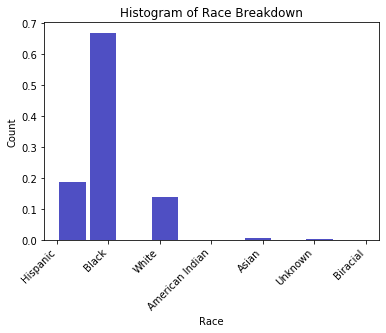

In [7]:
plt.hist(x = sentence['RACE'] ,color= '#0504aa', alpha=0.7, rwidth=0.85,
         weights=np.ones(len(sentence['RACE'])) / len(sentence['RACE']))
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Histogram of Race Breakdown')

#### The dataset contains primarily of three groups who are sentenced to prison: Black, Hispanic, and White. The remainder of the individuals make up minimal amount of the data.

Text(0.5, 1.0, 'Histogram of Gender Breakdown')

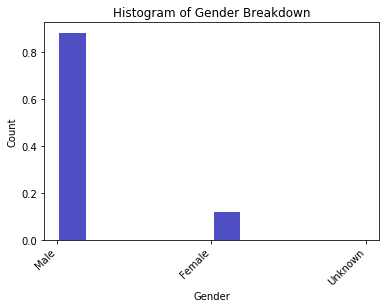

In [8]:
plt.hist(x = sentence['GENDER'] ,color= '#0504aa', alpha=0.7, rwidth=0.85,
         weights=np.ones(len(sentence['GENDER'])) / len(sentence['GENDER']))
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Histogram of Gender Breakdown')

#### We can also see that 90% of the data consists of male and remainder is female.

#### Now that we have an understanding of the basic distribution of the data, there are a few tasks that we can work on. The first task is predicting the COMMITMENT_TERM using the selected set of features. The second task we can work on is a classification task regarding race. The goal here will be to based the existing data we need to classify each sample. There are a various methods we will attempt in order to optimize the predictive and classification capabilities of the models.

## Part 1: Supervised Learning - Linear Regression (Ordinary Least Squares, Lasso, Ridge, and Stochastic Gradient Descent Regressor)

In [9]:
sentence = pd.get_dummies(sentence)
sentence.head()

,CHARGE_COUNT,COMMITMENT_TERM,OFFENSE_CATEGORY_Aggravated Battery,OFFENSE_CATEGORY_DUI,OFFENSE_CATEGORY_Driving With Suspended Or Revoked License,OFFENSE_CATEGORY_Failure to Register as a Sex Offender,OFFENSE_CATEGORY_Fleeing or Failure to Return,OFFENSE_CATEGORY_Forgery,OFFENSE_CATEGORY_Homicide,OFFENSE_CATEGORY_Narcotics,...,RACE_American Indian,RACE_Asian,RACE_Biracial,RACE_Black,RACE_Hispanic,RACE_Unknown,RACE_White,GENDER_Female,GENDER_Male,GENDER_Unknown
0,2,2.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,24,9.25,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,23,9.25,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,5,52.86,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,6,52.86,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
sen_train = sentence.drop(['COMMITMENT_TERM'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sen_train, target, test_size = 0.30, random_state = 949)

#### We will next build a model on the dataset to predict the length of the sentencing of the individual. In this process, we will test the following methods:

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Stochastic Gradient Regressor


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
linmodel.score(X_train, y_train)

0.1797715809906696

In [15]:
pred = linmodel.predict(X_train)
rmse = np.sqrt((sum(y_train - pred)**2)/len(y_train))
rmse

0.009677732384078236

In [16]:
linmodel.coef_

array([ 7.77372165e-02, -1.84483562e+11, -1.84483562e+11, -1.84483562e+11,
       -1.84483562e+11, -1.84483562e+11, -1.84483562e+11, -1.84483562e+11,
       -1.84483562e+11, -1.84483562e+11, -1.84483562e+11, -1.84483562e+11,
       -1.84483562e+11,  9.04472502e+09,  9.04472502e+09,  9.04472505e+09,
       -2.62720940e+10, -2.62720940e+10, -2.62720940e+10, -2.62720940e+10,
       -2.62720940e+10, -2.62720940e+10, -2.62720940e+10,  1.99687971e+10,
        1.99687971e+10,  1.99687971e+10])

#### The linear model R-squared value shows that the model only explains 17.9% of variance in the data. However, the model derives a low root mean squared error.

In [17]:
#The function will take in training data and target variable
#Function takes in training, target, mode, and number of folds
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_squared_error
def optimalFeatures(training, target, model, n):
    percentiles = range(1, 100, 5)
    results = []
    
    print("The Percentile Accuracy Scores are:")
    for i in range(1,100,5):
        fs = SelectPercentile(score_func = f_regression, percentile = i)
        X_train_fs = fs.fit_transform(training, target)
        scores = cross_val_score(model, X_train_fs, target, cv = n)
        print("%2d  %0.4f" % (i, scores.mean()))
        results = np.append(results, scores.mean())
        
    optimal_percentile_ind = np.where(results == results.max())[0][0]
    optimal_num_features = int(percentiles[optimal_percentile_ind]*len(training.columns)/100)
    
    pctFeatures = percentiles[optimal_percentile_ind]
    print("\nOptimal Percentile of Features is: ", pctFeatures)
    print("\nOptimal Number of Features is: ", optimal_num_features)
    
    plt.plot(percentiles, results)
    plt.xlabel("Percentage of Features Selected")
    plt.ylabel("Cross Validation Accuracy")
    plt.title("Regression Model Features versus Cross Validation Accuracy")
    
    return pctFeatures, optimal_num_features

The Percentile Accuracy Scores are:
 1  0.1631
 6  0.1651
11  0.1707
16  0.1762
21  0.1783
26  0.1783
31  0.1795
36  0.1813
41  0.1817
46  0.1833
51  0.1833
56  0.1833
61  0.1834
66  0.1834
71  0.1834
76  0.1835
81  0.1834
86  0.1834
91  0.1834
96  0.1834

Optimal Percentile of Features is:  76

Optimal Number of Features is:  19


(76, 19)

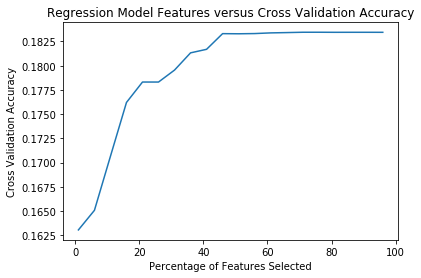

In [18]:
sc = optimalFeatures(X_train, y_train, linmodel, 5)
sc

In [19]:
from sklearn.metrics import mean_absolute_error, make_scorer


def info_var(training, target, testData, testTarget, percentile, k):
    fs = SelectPercentile(score_func = f_regression, percentile = percentile)
    X_train_fs = fs.fit_transform(training, target)
    
    a = training.columns[fs.get_support()].values
    
    print("The most informative variables and their respective weights are :\n")
    for i in range(len(training.columns.values)):
        if fs.get_support()[i]:
            print("%10s  %3.2f" % (training.columns.values[i], fs.scores_[i]))
    
    reg = LinearRegression().fit(X_train_fs, target)
    X_test_fs = fs.transform(testData)
    
    validation = cross_val_score(reg, X_test_fs, testTarget, cv = k, 
                                 scoring = make_scorer(mean_squared_error))
    print("\nThe root_mean_squared_errors for each fold are as follows: \n", np.sqrt(validation))
    
    return np.sqrt(validation)

In [20]:
#Inputing the training, target, testing, testing target, 
#optimal number of features and number of folds
rmse = info_var(X_train, y_train, X_test, y_test, sc[1], 5)
rmse

The most informative variables and their respective weights are :

CHARGE_COUNT  4616.42
OFFENSE_CATEGORY_Homicide  26385.10
OFFENSE_CATEGORY_Narcotics  717.72
OFFENSE_CATEGORY_Sex Crimes  808.63
CHARGE_DISPOSITION_Not Guilty  1144.42

The root_mean_squared_errors for each fold are as follows: 
 [10.65154317 10.24387262  9.99786124 10.02452356 13.60059847]


array([10.65154317, 10.24387262,  9.99786124, 10.02452356, 13.60059847])

#### The function info_var calculates the scores for each of the features in the dataset. The purpose of this is to identify the most informative features iwthin the datasets. Based on the values returned, it makes sense that Charge Count is the most informative feature since more counts of a crime generally equate to more time served for the individual. Lastly, through the Root Mean Squared Error calculations we can see that each of the folds provided similar error values with the second fold resulting in the lowest error calculation. 

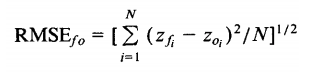


Text(0.5, 1.0, 'K-fold versus RMSE')

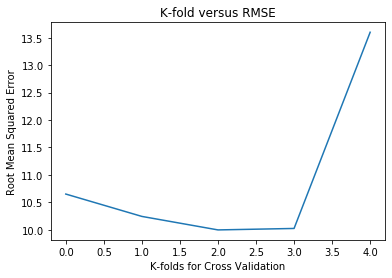

In [21]:
crossval = range(5)

plt.plot(crossval, rmse)
plt.xlabel("K-folds for Cross Validation")
plt.ylabel("Root Mean Squared Error")
plt.title("K-fold versus RMSE")

#### Next, we will perform ridge and lasso regression which essentially adds a penalty value to the ordinary least squares model to improve the accuracy of the model. Lasso Regression is known as the L1 norm calculation and Ridge is the L2 norm calculation. The primary differences between the two is how the distance between the points is calculated.

In [22]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold

#First we will convert the test and train datasets into numpy arrays for the calculations below
dlst = [X_train, X_test, y_train, y_test]
for i in dlst:
    i = np.array(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
def crossval(m, X, y, n):
    #m is the model
    #X is the data
    #y is the target variable
    #n is the number of folds
    kf = KFold(n_splits = n, random_state = 234293, shuffle = True)
    errval = 0
    for train, test in kf.split(X):
        m.fit(X[train],y[train])
        p = m.predict(X[test])
        e = p - y[test]
        rmse = np.sqrt(np.dot(e,e)/len(X[test]))
        errval += rmse
    return errval/n

#### The regression below will be cross validated for alpha parameters incrementing by 0.01 from 20 to 50. For each alpha value, there will be 5 cross validations that are performed and produces a list of the alpha parameters, training total rmse and the cross validation rmse.

In [24]:
#Ridge regression calculations
def ridge_reg(training, target, testing, testTarget,k):
    alpha = np.linspace(.01,20,50)
    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('alpha\t RMSE_train\t RMSE_5cv\n')
    for i in alpha:
        ridge = Ridge(alpha = i)
        #calculating the Root Mean Squared Error
        
        ridge.fit(training, target)
        p = ridge.predict(training)
        error = p - target
        total_error = np.dot(error,error)
        
        rmse_train = np.sqrt(total_error/len(p))
        
        #calculating the cross fold validation
        rmse_5cv = crossval(ridge, training, target, k)
        
        t_rmse = np.append(t_rmse,[rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_5cv])

        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(i,rmse_train,rmse_5cv))
    return alpha, t_rmse, cv_rmse

In [25]:
rr = ridge_reg(X_train, y_train, X_test, y_test, 5)

alpha	 RMSE_train	 RMSE_5cv

0.010	 7.9752		 7.7927
0.418	 7.9752		 7.7927
0.826	 7.9752		 7.7927
1.234	 7.9752		 7.7927
1.642	 7.9752		 7.7927
2.050	 7.9752		 7.7927
2.458	 7.9752		 7.7927
2.866	 7.9752		 7.7927
3.274	 7.9752		 7.7927
3.682	 7.9752		 7.7927
4.090	 7.9752		 7.7927
4.498	 7.9752		 7.7927
4.906	 7.9752		 7.7928
5.313	 7.9752		 7.7928
5.721	 7.9752		 7.7928
6.129	 7.9752		 7.7928
6.537	 7.9752		 7.7928
6.945	 7.9752		 7.7928
7.353	 7.9752		 7.7928
7.761	 7.9753		 7.7928
8.169	 7.9753		 7.7929
8.577	 7.9753		 7.7929
8.985	 7.9753		 7.7929
9.393	 7.9753		 7.7929
9.801	 7.9753		 7.7929
10.209	 7.9753		 7.7929
10.617	 7.9753		 7.7929
11.025	 7.9753		 7.7930
11.433	 7.9753		 7.7930
11.841	 7.9753		 7.7930
12.249	 7.9753		 7.7930
12.657	 7.9754		 7.7930
13.065	 7.9754		 7.7931
13.473	 7.9754		 7.7931
13.881	 7.9754		 7.7931
14.289	 7.9754		 7.7931
14.697	 7.9754		 7.7931
15.104	 7.9754		 7.7932
15.512	 7.9754		 7.7932
15.920	 7.9754		 7.7932
16.328	 7.9755		 7.7932
16.736	 7.97

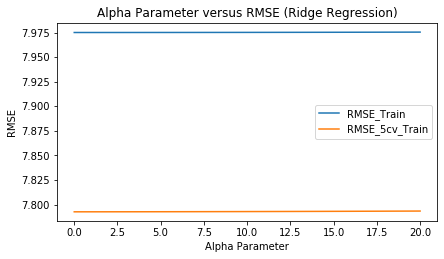

In [26]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(222)
ax.plot(rr[0], rr[1], label = 'RMSE_Train')
ax.plot(rr[0], rr[2], label = 'RMSE_5cv_Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Alpha Parameter')
plt.title('Alpha Parameter versus RMSE (Ridge Regression)')
plt.show()

#### Based on the Ridge Regression analysis, we can see that as the Alpha parameter increases there is virtually minimal to no change in the RMSE. Furthermore, what we can clearly see within the results is that the RMSE calculated is lower than the RMSE calculated from the Ordinary Least Squares Model. Next, we will attempt to see if we see any improvement in results with the Lasso Regression.

In [27]:
#Lasso regression calculations
def lasso_reg(training, target, testing, testTarget,k):
    alpha = np.linspace(.01,1,50)
    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('alpha\t RMSE_train\t RMSE_5cv\n')
    for i in alpha:
        lasso = Lasso(alpha = i)
        #calculating the Root Mean Squared Error
        
        lasso.fit(training, target)
        p = lasso.predict(training)
        error = p - target
        total_error = np.dot(error,error)
        
        rmse_train = np.sqrt(total_error/len(p))
        
        #calculating the cross fold validation
        rmse_5cv = crossval(lasso, training, target, k)
        
        t_rmse = np.append(t_rmse,[rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_5cv])

        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(i,rmse_train,rmse_5cv))
    return alpha, t_rmse, cv_rmse

In [28]:
lr = lasso_reg(X_train, y_train, X_test, y_test, 5)

alpha	 RMSE_train	 RMSE_5cv

0.010	 7.9848		 7.8034
0.030	 8.0132		 7.8342
0.050	 8.0321		 7.8556
0.071	 8.0582		 7.8847
0.091	 8.0915		 7.9215
0.111	 8.1221		 7.9546
0.131	 8.1514		 7.9867
0.151	 8.1850		 8.0234
0.172	 8.2232		 8.0651
0.192	 8.2643		 8.1097
0.212	 8.3086		 8.1577
0.232	 8.3563		 8.2092
0.252	 8.4079		 8.2649
0.273	 8.4635		 8.3246
0.293	 8.5230		 8.3883
0.313	 8.5863		 8.4558
0.333	 8.6533		 8.5208
0.353	 8.6642		 8.5341
0.374	 8.6642		 8.5341
0.394	 8.6643		 8.5342
0.414	 8.6644		 8.5343
0.434	 8.6644		 8.5343
0.454	 8.6645		 8.5344
0.475	 8.6646		 8.5344
0.495	 8.6646		 8.5345
0.515	 8.6647		 8.5346
0.535	 8.6648		 8.5347
0.556	 8.6649		 8.5347
0.576	 8.6649		 8.5348
0.596	 8.6650		 8.5349
0.616	 8.6651		 8.5350
0.636	 8.6652		 8.5351
0.657	 8.6653		 8.5352
0.677	 8.6654		 8.5353
0.697	 8.6655		 8.5354
0.717	 8.6656		 8.5355
0.737	 8.6657		 8.5356
0.758	 8.6658		 8.5357
0.778	 8.6659		 8.5358
0.798	 8.6660		 8.5359
0.818	 8.6661		 8.5360
0.838	 8.6663		 8.5362
0.859

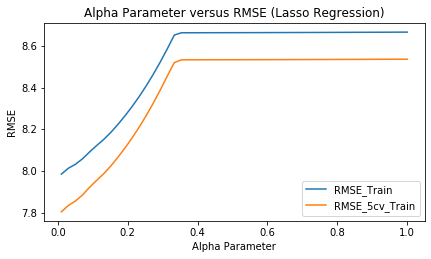

In [29]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(222)
ax.plot(lr[0], lr[1], label = 'RMSE_Train')
ax.plot(lr[0], lr[2], label = 'RMSE_5cv_Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Alpha Parameter')
plt.title('Alpha Parameter versus RMSE (Lasso Regression)')
plt.show()

#### The calculations for Lasso Regression where the alpha parameter ranges from .01 to 1 shows that as the alpha parameter increases the RMSE for the training and the cross validation data set increase until alpha equals 0.313. The error values stabilize as the alpha parameter increases after that. The most optimal alpha parameter in this case is also 0.010 which produces the smallest error for the data.

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

#### Next, we will build a Stochastic Gradient Descent Model. In order to do so, we will need to find the most optimal parameters, such as, the alpha parameter, the l1 ratio, the type of penalty parameter used and the learning rate. Using the GridSearch cross validation, the system will produce the parameters with the most optimized results.

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
xtrain_s = scaler.transform(X_train)
xtest_s = scaler.transform(X_test)

sgdreg = SGDRegressor(penalty='l2', learning_rate = 'constant',
                      alpha=0.01, max_iter=300)

#### Below are the list of parameters that we will try to use in order to optimize the model.

In [32]:
param_grid = {
    'alpha': np.linspace(0.01, 10, 10),
    'penalty': ['l2','l1','elasticnet'],
    'l1_ratio': np.linspace(0.01, 1, 50)
}

In [33]:
gs = GridSearchCV(sgdreg, param_grid, verbose = 1, cv = 3)

#### Due to the size of the data containing over 130,000 rows, we can estimate the best parameters using a subset of the data and apply it to the model to see how it performs.

In [34]:
gs.fit(xtrain_s[:20000], y_train[:20000])

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SGDRegressor(alpha=0.01, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='constant',
                                    loss='squared_loss', max_iter=300,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=Fal...
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.

In [35]:
gs.best_params_

{'alpha': 1.12, 'l1_ratio': 0.39387755102040817, 'penalty': 'elasticnet'}

In [36]:
sgdreg2 = SGDRegressor(l1_ratio = 0.11102040816326529, learning_rate = 'constant', 
                      alpha = 0.8255102040816327, penalty = 'elasticnet')

In [37]:
def SGDTester(training, target, testing, testtarget):    
    rmse = []
    datalst = [(training,target), (testing, testtarget)]
    for i in datalst:
        preds = sgdreg2.predict(i[0])
        err2 = preds - i[1]
        rmse.append(np.sqrt(np.dot(err2,err2)/len(preds)))
    
    print("Method: Stochastic Gradient Descent")
    print("RMSE on training data: %.4f" %rmse[0])
    print("RMSE on testing data: %.4f" %rmse[1])
    print("\n")
    return rmse

In [38]:
sgdreg2.fit(xtrain_s, y_train)

SGDRegressor(alpha=0.8255102040816327, average=False, early_stopping=False,
             epsilon=0.1, eta0=0.01, fit_intercept=True,
             l1_ratio=0.11102040816326529, learning_rate='constant',
             loss='squared_loss', max_iter=1000, n_iter_no_change=5,
             penalty='elasticnet', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### Using the best parameters, while the training data's RMSE is 8.6675, the error increases significantly when tested on the testing data. Now, we can accumulate the results for each of the regression tests.

In [39]:
#Ridge and Lasso Regression
#Evaluating the Ridge, Lasso, and OLS models to see which one performs the best
l_alpha = lr[0][np.where(lr[2] == lr[2].min())[0][0]]
r_alpha = rr[0][np.where(rr[2] == rr[2].min())[0][0]]

lasso = Lasso(alpha = l_alpha)
ridge = Ridge(alpha = r_alpha)
linreg = LinearRegression()

In [40]:
def model_review(model, training, target, testing, testtarget):
    model.fit(training, target)
    #training model
    preds = model.predict(training)
    error = target - preds
    rmse_training = np.sqrt(np.dot(error, error)/len(target))
    
    #testing the model
    preds_testing = model.predict(testing)
    error_test = testtarget - preds_testing
    rmse_testing = np.sqrt(np.dot(error_test, error_test)/len(testtarget))
    
    return rmse_training, rmse_testing

In [41]:
lst = [('Lasso',lasso), ("Ridge",ridge), ('Linear Regression', linreg)]

for name, i in lst:
    mod = model_review(i, X_train, y_train, X_test, y_test)
    print("Method: %s" %name)
    print("RMSE on training data: %.4f" %mod[0])
    print("RMSE on testing data: %.4f" %mod[1])
    print("\n")

Method: Lasso
RMSE on training data: 7.9848
RMSE on testing data: 11.0027


Method: Ridge
RMSE on training data: 7.9752
RMSE on testing data: 10.9800


Method: Linear Regression
RMSE on training data: 7.9752
RMSE on testing data: 10.9800




In [42]:
SGD = SGDTester(xtrain_s, y_train, xtest_s, y_test)

Method: Stochastic Gradient Descent
RMSE on training data: 8.2660
RMSE on testing data: 11.3077




#### Based on the calculations, we can see that the Ordinary Least Squares and Linear Regression Models performed the best. Meanwhile, the SGD and Lasso regression methods produced a higher RMSE value. We can clearly say that based on the models created, the Linear Regression was the simplest and easiest model to replicate. However, we need to keep in mind a few things. 

#### The first is that the model's overall predictive ability measured through R-squared coefficient is approximately 18% at best. This basically means the model can only explain 18% of the variance in the data which is a weak value. The second thing that we can also see the weakness in predictive power when we look at the Root Mean Squared Error. Using the RMSE on the training data, the model is generally off by approximately 8 years in predicting the length of the prison sentence. Similarly, the model is even worse when predicting the testing data where it is off by 10+ years.

#### Even so, we can see some clear insights from the analysis namely the impact of certain features and the number of features required to have the best model. The most informative variables are as follows:
#### 1. CHARGE_COUNT  4616.42
#### 2. OFFENSE_CATEGORY_Homicide  26385.10
#### 3. OFFENSE_CATEGORY_Narcotics  717.72
#### 4. OFFENSE_CATEGORY_Sex Crimes  808.63
#### 5. CHARGE_DISPOSITION_Not Guilty  1144.42

#### Another element to keep in mind is the need for domain knowledge and understanding. While we can use the basic data available to predict to a certain degree the length of the prison sentence, the fact of the matter is that there are quite a few subjective elements that determine how long someone's sentence is. For example, the severity of the crime committed (1st degree versus 3rd degree) the actual circumstances involving the crime committed and other case specifics could not be considered as data elements.

## Part 2: Unsupervised Learning - Clustering

#### The next objective is to model some unsupervised learning using Clustering methods on the dataset. For this process, we need to separate out the label from the dataset which in this case will be 'RACE' to see if we can correctly classify the data using clustering methods.

In [43]:
#Same subset of the data except we changed the target variable to Race instead of Commitment Term
sentence2 = sen.loc[:,['OFFENSE_CATEGORY','CHARGE_DISPOSITION','CHARGE_COUNT',
                       'RACE', 'GENDER', 'COMMITMENT_TERM']]
target2 = sentence2['RACE']
s = sentence2.drop('RACE', axis = 1)
s.head()

,OFFENSE_CATEGORY,CHARGE_DISPOSITION,CHARGE_COUNT,GENDER,COMMITMENT_TERM
0,UUW - Unlawful Use of Weapon,Guilty,2,Male,2.00
1,Aggravated Battery,Guilty,24,Male,9.25
2,Aggravated Battery,Guilty,23,Male,9.25
3,Aggravated Battery,Guilty,5,Male,52.86
4,Aggravated Battery,Guilty,6,Male,52.86


In [44]:
s = pd.get_dummies(s)
s.head()

,CHARGE_COUNT,COMMITMENT_TERM,OFFENSE_CATEGORY_Aggravated Battery,OFFENSE_CATEGORY_DUI,OFFENSE_CATEGORY_Driving With Suspended Or Revoked License,OFFENSE_CATEGORY_Failure to Register as a Sex Offender,OFFENSE_CATEGORY_Fleeing or Failure to Return,OFFENSE_CATEGORY_Forgery,OFFENSE_CATEGORY_Homicide,OFFENSE_CATEGORY_Narcotics,OFFENSE_CATEGORY_Other Offense,OFFENSE_CATEGORY_Sex Crimes,OFFENSE_CATEGORY_Theft,OFFENSE_CATEGORY_UUW - Unlawful Use of Weapon,CHARGE_DISPOSITION_Dismissed,CHARGE_DISPOSITION_Guilty,CHARGE_DISPOSITION_Not Guilty,GENDER_Female,GENDER_Male,GENDER_Unknown
0,2,2.00,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,24,9.25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,23,9.25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,5,52.86,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,6,52.86,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [45]:
# We are calculating 7 clusters because that is how many levels are in the RACE column
from kMeans import *
centroids, clusters = kMeans(s, 7)

#### For the clustering algorithm, we will be using (1 - Cosine Similarity) to calculate the distance. The below is the implementation of the code calculating the distance.

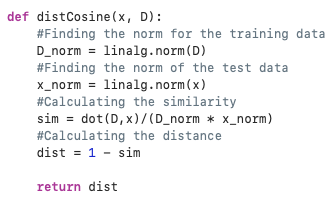

In [46]:
clus = pd.DataFrame(clusters, columns = ['cluster','col'])
cluster_df = clus.cluster.value_counts().rename_axis('unique_values').reset_index(name='counts')
cluster_df

,unique_values,counts
0,0.0,76399
1,2.0,33663
2,4.0,32463
3,1.0,19580
4,3.0,16726
5,5.0,10820
6,6.0,9695


In [47]:
pd.options.display.float_format='{:,.2f}'.format

raw_centroids = pd.DataFrame(centroids,columns = s.columns)
raw_centroids.T

,0,1,2,3,4,5,6
CHARGE_COUNT,1.06,1.13,1.22,4.16,1.50,8.95,1.95
COMMITMENT_TERM,2.07,1.84,1.06,3.42,5.20,1.97,20.28
OFFENSE_CATEGORY_Aggravated Battery,0.04,0.08,0.03,0.16,0.08,0.16,0.05
OFFENSE_CATEGORY_DUI,0.11,0.09,0.08,0.11,0.05,0.14,0.02
OFFENSE_CATEGORY_Driving With Suspended Or Revoked License,0.05,0.03,0.11,0.04,0.01,0.04,0.00
OFFENSE_CATEGORY_Failure to Register as a Sex Offender,0.02,0.00,0.00,0.00,0.03,0.00,0.00
OFFENSE_CATEGORY_Fleeing or Failure to Return,0.04,0.03,0.02,0.03,0.01,0.01,0.00
OFFENSE_CATEGORY_Forgery,0.01,0.05,0.00,0.02,0.01,0.02,0.00
OFFENSE_CATEGORY_Homicide,0.00,0.00,0.00,0.02,0.01,0.03,0.17
OFFENSE_CATEGORY_Narcotics,0.31,0.33,0.56,0.18,0.23,0.10,0.09


Text(0.5, 1.0, 'Histogram of Race Breakdown')

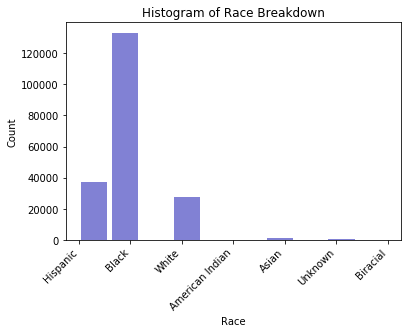

In [48]:
plt.hist(x = target2 ,color= '#0504aa', alpha=0.5, rwidth=0.85)
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Histogram of Race Breakdown')

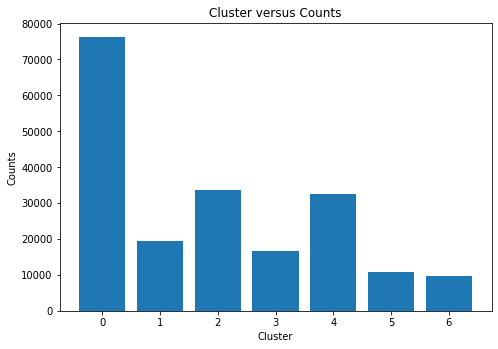

In [49]:
# With a basic eye test on the label distribution compared to the cluster
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cluster_df.unique_values, cluster_df.counts)
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Cluster versus Counts')
plt.show()

#### The distribution of the clusters is visibly inaccurate because there are items forced into clusters for which there were less than 0.1% of those items in the population. Now we can look at the breakdown of each of the clusters to see how the data was classified.

In [50]:
def cluster_receipt(cluster, idfData, n):
    size = {}
    #clus
    cluster_labels = np.unique(cluster['cluster'])

    for c in cluster_labels:
        size[c] = len(cluster[cluster['cluster']== c])
    #n
    for i in size.keys():
        cluster_rep = size[i]
        #td_tfidf
        sample = idfData[idfData['Cluster'] == i]
        print("\nCluster", i, "size = ", size[i])
        print("-----------------------------------------")
        #head['Terms'] = sam[:n].index
        sam = sample.iloc[:,:-1].astype(bool).sum(axis = 0).sort_values(ascending = False)
        head = sam
        perDocs = (head/size[i]) * 100
        freq = raw_centroids.T[i]
        head = pd.concat([head, freq, perDocs], axis = 1)
        head.columns = ["DF","FREQ","Per of Docs"]
        val = head.sort_values(by = "DF", ascending = False).iloc[:,:n]
        print(val.iloc[:n])
    return

In [51]:
s['Cluster'] = clus['cluster']
cluster_receipt(clus, s, 8)


Cluster 0.0 size =  76399
-----------------------------------------
                                                  DF  FREQ  Per of Docs
CHARGE_COUNT                                   76399  1.06       100.00
COMMITMENT_TERM                                76399  2.07       100.00
GENDER_Male                                    76398  1.00       100.00
CHARGE_DISPOSITION_Guilty                      76099  1.00        99.61
OFFENSE_CATEGORY_Theft                         25581  0.33        33.48
OFFENSE_CATEGORY_Narcotics                     23904  0.31        31.29
OFFENSE_CATEGORY_DUI                            8622  0.11        11.29
OFFENSE_CATEGORY_UUW - Unlawful Use of Weapon   4314  0.06         5.65

Cluster 1.0 size =  19580
-----------------------------------------
                                        DF  FREQ  Per of Docs
CHARGE_COUNT                         19580  1.13       100.00
GENDER_Female                        19580  1.00       100.00
COMMITMENT_TERM             

In [52]:
newC = clus["cluster"].astype(int)
newC

0         3
1         5
2         5
3         6
4         6
         ..
199341    0
199342    0
199343    4
199344    4
199345    4
Name: cluster, Length: 199346, dtype: int64

In [53]:
from sklearn.metrics import completeness_score, homogeneity_score
cs = completeness_score(target2, newC)
print('The Completeness Score is', cs,'\n')
hs = homogeneity_score(target2, newC)
print('The Homogeneity Score is', hs, '\n')

The Completeness Score is 0.005141614269385242 

The Homogeneity Score is 0.009727307751501187 



#### Based on the above we can see that clustering does not enable us to sort out the RACE of an individual being sentenced. The completeness score, which calculates whether all members of a give class are assigned to the same cluster, shows that the clustering method did not accurately classify the Race. Next, the homogeneity score, which measures each cluster contrains only members of a single class, shows that the levels with in RACE were scattered across multiple cluster. This makes sense because when we saw the initial distribution of the label data, a few of the categories only represented less than 0.1% of the population, however, the clustering algorithm calculated significant values for the smaller labels.

In [54]:
#Same subset of the data except we changed the target variable to Race instead of Commitment Term
sentence2 = sen.loc[:,['OFFENSE_CATEGORY','CHARGE_DISPOSITION','CHARGE_COUNT',
                       'RACE', 'GENDER', 'COMMITMENT_TERM']]
target2 = sentence2['RACE']
s = sentence2.drop('RACE', axis = 1)
s = pd.get_dummies(s)
s.head()

,CHARGE_COUNT,COMMITMENT_TERM,OFFENSE_CATEGORY_Aggravated Battery,OFFENSE_CATEGORY_DUI,OFFENSE_CATEGORY_Driving With Suspended Or Revoked License,OFFENSE_CATEGORY_Failure to Register as a Sex Offender,OFFENSE_CATEGORY_Fleeing or Failure to Return,OFFENSE_CATEGORY_Forgery,OFFENSE_CATEGORY_Homicide,OFFENSE_CATEGORY_Narcotics,OFFENSE_CATEGORY_Other Offense,OFFENSE_CATEGORY_Sex Crimes,OFFENSE_CATEGORY_Theft,OFFENSE_CATEGORY_UUW - Unlawful Use of Weapon,CHARGE_DISPOSITION_Dismissed,CHARGE_DISPOSITION_Guilty,CHARGE_DISPOSITION_Not Guilty,GENDER_Female,GENDER_Male,GENDER_Unknown
0,2,2.00,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,24,9.25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,23,9.25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,5,52.86,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,6,52.86,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [55]:
#Retrying the clustering algorithm but using the function from the SKLEARN module
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans (n_clusters = 7, max_iter = 500, verbose = 1)
kmeans.fit(s)
clusters = kmeans.predict(s)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2711004.319803083
start iteration
done sorting
end inner loop
Iteration 1, inertia 2654852.5261021717
start iteration
done sorting
end inner loop
Iteration 2, inertia 2645375.117968533
start iteration
done sorting
end inner loop
Iteration 3, inertia 2639940.798090273
start iteration
done sorting
end inner loop
Iteration 4, inertia 2639376.3350221114
start iteration
done sorting
end inner loop
Iteration 5, inertia 2639321.9198980713
start iteration
done sorting
end inner loop
Iteration 6, inertia 2639279.8435463794
start iteration
done sorting
end inner loop
Iteration 7, inertia 2639279.8435463794
center shift 0.000000e+00 within tolerance 5.616322e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3117532.3058487237
start iteration
done sorting
end inner loop
Iteration 1, inertia 2883997.361015838
start iteration
done sorting
end inner loop
Iteration 2, ine

Iteration 25, inertia 2847639.991263546
start iteration
done sorting
end inner loop
Iteration 26, inertia 2847526.0858846228
start iteration
done sorting
end inner loop
Iteration 27, inertia 2847456.6642451817
start iteration
done sorting
end inner loop
Iteration 28, inertia 2847413.7061885395
start iteration
done sorting
end inner loop
Iteration 29, inertia 2847383.589276455
start iteration
done sorting
end inner loop
Iteration 30, inertia 2847310.8406186793
start iteration
done sorting
end inner loop
Iteration 31, inertia 2847254.669921869
start iteration
done sorting
end inner loop
Iteration 32, inertia 2847116.6519437386
start iteration
done sorting
end inner loop
Iteration 33, inertia 2847029.9060027655
start iteration
done sorting
end inner loop
Iteration 34, inertia 2847029.9060027655
center shift 0.000000e+00 within tolerance 5.616322e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2836611.677424137
start iteration
done sorting
end i

In [57]:
clusters

array([0, 5, 5, ..., 6, 6, 6], dtype=int32)

In [58]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns= s.columns)
centroids 

,CHARGE_COUNT,COMMITMENT_TERM,OFFENSE_CATEGORY_Aggravated Battery,OFFENSE_CATEGORY_DUI,OFFENSE_CATEGORY_Driving With Suspended Or Revoked License,OFFENSE_CATEGORY_Failure to Register as a Sex Offender,OFFENSE_CATEGORY_Fleeing or Failure to Return,OFFENSE_CATEGORY_Forgery,OFFENSE_CATEGORY_Homicide,OFFENSE_CATEGORY_Narcotics,OFFENSE_CATEGORY_Other Offense,OFFENSE_CATEGORY_Sex Crimes,OFFENSE_CATEGORY_Theft,OFFENSE_CATEGORY_UUW - Unlawful Use of Weapon,CHARGE_DISPOSITION_Dismissed,CHARGE_DISPOSITION_Guilty,CHARGE_DISPOSITION_Not Guilty,GENDER_Female,GENDER_Male,GENDER_Unknown
0,1.39,2.00,0.06,0.10,0.05,0.01,0.03,0.02,0.00,0.34,0.02,0.01,0.24,0.11,0.00,1.00,0.00,0.13,0.87,0.00
1,22.09,"1,039.65",0.00,0.00,0.00,0.00,0.09,0.00,0.73,0.18,-0.00,0.00,0.00,-0.00,-0.00,1.00,-0.00,0.00,1.00,0.00
2,86.77,23.08,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.88,-0.00,0.00,0.12,-0.00,0.01,-0.00,1.00,0.00,0.04,0.96,-0.00
3,9.77,61.95,0.03,-0.00,0.00,0.00,0.00,-0.00,0.80,0.01,0.02,0.09,0.05,0.00,0.01,0.95,0.04,0.02,0.98,0.00
4,3.39,25.12,0.05,0.01,0.00,0.00,0.00,0.00,0.28,0.04,0.03,0.12,0.45,0.02,0.00,1.00,0.00,0.03,0.97,0.00
5,11.49,3.37,0.19,0.12,0.02,0.00,0.01,0.01,0.04,0.05,0.02,0.13,0.07,0.34,0.00,0.99,0.00,0.09,0.91,-0.00
6,1.72,7.33,0.07,0.02,0.00,0.01,0.00,0.00,0.01,0.21,0.01,0.07,0.41,0.18,0.00,1.00,0.00,0.04,0.96,0.00


In [59]:
import time
start = time.time()
from sklearn import metrics
silhouettes = metrics.silhouette_samples(s, clusters)
end = time.time()
print('Seconds = ', str(end - start))
silhouettes

Seconds =  387.0120460987091


array([0.65812133, 0.32602801, 0.33145444, ..., 0.39737954, 0.39737954,
       0.39737954])

In [60]:
silhouettes.mean()

0.5799571995071428

In [61]:
def plot_silhouettes(data, clusters, silhouettes):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    import matplotlib.pyplot as pl
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouettes
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

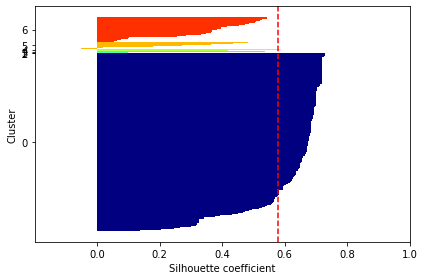

Seconds =  268.25747084617615


In [62]:
start = time.time()
plot_silhouettes(s, clusters, silhouettes)
end = time.time()
print('Seconds = ', str(end - start))

In [63]:
from sklearn.metrics import completeness_score, homogeneity_score
cs = completeness_score(clusters, target2)
print('The Completeness Score is', cs,'\n')
hs = homogeneity_score(clusters, target2)
print('The Homogeneity Score is', hs, '\n')

The Completeness Score is 0.0038271455206739346 

The Homogeneity Score is 0.005714088614275527 



In [64]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(s[clusters == c])
    return size

In [65]:
#Showing the size of the clusters

size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  165989
Size of Cluster 1 =  11
Size of Cluster 2 =  193
Size of Cluster 3 =  1131
Size of Cluster 4 =  2589
Size of Cluster 5 =  6124
Size of Cluster 6 =  23309


#### While the distribution of the clusters mimics the distributions of the RACE labels, the Completeness and Homogeneity tell a different story. The clustering miss labels and classifies the data incorrectly where the items of the same labels are a part of multiple groups and each cluster contains members of more than one level. Lastly, we will attempt a Principal Component Analysis and redo the clustering.

In [66]:
#Calculating the centroids for the clusters
pd.options.display.float_format='{:,.2f}'.format

import kMeans
centroids_pca, clusters_pca = kMeans.kMeans(s, 7, kMeans.distCosine, kMeans.randCent)
clusters_pca

array([[5.00000000e+00, 3.55211538e-03],
       [4.00000000e+00, 1.35893743e-04],
       [4.00000000e+00, 1.53879761e-04],
       ...,
       [0.00000000e+00, 2.45884271e-04],
       [0.00000000e+00, 2.45884271e-04],
       [0.00000000e+00, 2.45884271e-04]])

In [67]:
clusters_df = pd.DataFrame(clusters_pca)
clusters_df[0].value_counts()

5.00    42080
3.00    40813
0.00    34319
6.00    33020
2.00    19031
4.00    18948
1.00    11135
Name: 0, dtype: int64

In [68]:
cs = completeness_score(clusters_df.iloc[:,1], target2)
print('The Completeness Score is', cs,'\n')
hs = homogeneity_score(clusters_df.iloc[:,1], target2)
print('The Homogeneity Score is', hs, '\n')

The Completeness Score is 0.1366286446295922 

The Homogeneity Score is 0.022290523526335336 



#### Of all the clustering models, the clustering with Principle Component Analysis fit the data best. However, it is only a small increment better than the KMeans clustering (both methods). 

## Part 3: Ensemble Methods

#### Lastly, we are going to attempt an Ensemble Method to classify the RACE levels in the data. The idea here is that the aggregate of weak models could be put together to create a stronger and more robust model. We are going to first build a Decision Tree Classifier and then run a RandomForest Classifier and rate the performance.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(s, target2, test_size=0.2, random_state=33)

In [70]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [71]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(X_train, y_train)

In [72]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.689 

Classification report


/Users/srikanthnanduri/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

American Indian       0.00      0.00      0.00        21
          Asian       0.22      0.01      0.02       232
       Biracial       0.00      0.00      0.00         7
          Black       0.71      0.95      0.81     26602
       Hispanic       0.54      0.28      0.37      7403
        Unknown       0.20      0.02      0.03        59
          White       0.33      0.02      0.04      5546

       accuracy                           0.69     39870
      macro avg       0.29      0.18      0.18     39870
   weighted avg       0.62      0.69      0.62     39870
 

Confussion matrix
[[    0     0     0    19     1     0     1]
 [    0     2     0   205    25     0     0]
 [    0     0     0     7     0     0     0]
 [    0     5     0 25289  1145     2   161]
 [    0     0     0  5275  2078     2    48]
 [    0     0     0    52     5     1     1]
 [    0     2     0  4864   574     0   106]] 



#### Looking at the above classification report, we see some promising results on the testing data. This is the best model yet. Next, we can run the RandomForestClassifier to see if we can produce a better model in the aggregate.

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=294)
rf = rf.fit(X_train, y_train)

In [74]:
measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.688 



In [75]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [76]:
msl = range(1,6)
print(msl)

range(1, 6)


min_samples_leaf = 1 Train = 0.7034287293895757 Test = 0.6855890625171406
min_samples_leaf = 2 Train = 0.6984828435377441 Test = 0.6896335586344599
min_samples_leaf = 3 Train = 0.6958601931264312 Test = 0.6905177062166259
min_samples_leaf = 4 Train = 0.694272180087015 Test = 0.6908500441531388
min_samples_leaf = 5 Train = 0.6937109671956215 Test = 0.6907810699870991


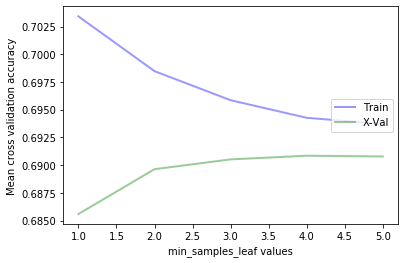

In [77]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

max_depth = 1 Train = 0.6678308963095301 Test = 0.6678308981773456
max_depth = 2 Train = 0.6678308963095301 Test = 0.6678308981773456
max_depth = 3 Train = 0.6678308963095301 Test = 0.6678308981773456
max_depth = 4 Train = 0.6678512755441754 Test = 0.6678497097067271
max_depth = 5 Train = 0.6678465726864061 Test = 0.6678308981773456
max_depth = 6 Train = 0.6873385359753359 Test = 0.6875266543685067
max_depth = 7 Train = 0.6885503145689594 Test = 0.6880032249740328
max_depth = 8 Train = 0.6891130948830101 Test = 0.6884170827489073


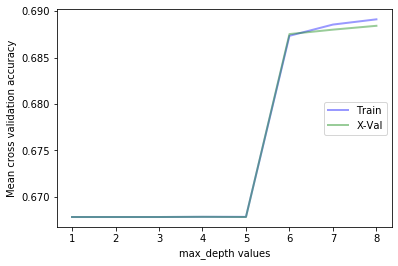

In [78]:
m_depth = [1,2,3,4,5,6,7,8]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

In [79]:
nest = range(5, 101, 5)

n_estimators = 5 Train = 0.702406631423513 Test = 0.6848365964270224
n_estimators = 10 Train = 0.7034287293895757 Test = 0.6855890625171406
n_estimators = 15 Train = 0.7039241015718143 Test = 0.6858022569667457
n_estimators = 20 Train = 0.7040824326034951 Test = 0.6862600038540368
n_estimators = 25 Train = 0.7042282225951124 Test = 0.6864418515214423
n_estimators = 30 Train = 0.7042736840327593 Test = 0.6863415217264544
n_estimators = 35 Train = 0.7043473628259088 Test = 0.6864293105673861
n_estimators = 40 Train = 0.7043661744290103 Test = 0.6862850885144709
n_estimators = 45 Train = 0.704402230052819 Test = 0.6863666050107275
n_estimators = 50 Train = 0.7044069329351632 Test = 0.6864104980550326
n_estimators = 55 Train = 0.704416338736714 Test = 0.6864543938516592
n_estimators = 60 Train = 0.7044163387121392 Test = 0.6863979582805427
n_estimators = 65 Train = 0.7044304474328963 Test = 0.6863979592635149
n_estimators = 70 Train = 0.7044398532221596 Test = 0.6865108274568315
n_estimato

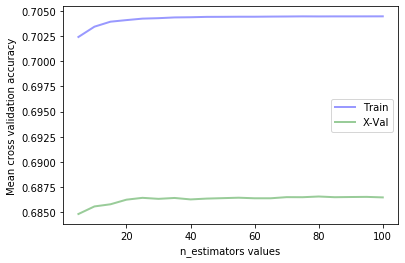

In [80]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

In [81]:
rf = RandomForestClassifier(n_estimators=80, min_samples_leaf=4, max_depth=8)
rf = rf.fit(X_train, y_train)

measure_performance(X_test, y_test, rf)

Accuracy:0.690 

Classification report


/Users/srikanthnanduri/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

American Indian       0.00      0.00      0.00        21
          Asian       0.00      0.00      0.00       232
       Biracial       0.00      0.00      0.00         7
          Black       0.70      0.97      0.81     26602
       Hispanic       0.56      0.25      0.34      7403
        Unknown       0.00      0.00      0.00        59
          White       0.67      0.00      0.00      5546

       accuracy                           0.69     39870
      macro avg       0.28      0.17      0.17     39870
   weighted avg       0.67      0.69      0.61     39870
 

Confussion matrix
[[    0     0     0    21     0     0     0]
 [    0     0     0   213    19     0     0]
 [    0     0     0     7     0     0     0]
 [    0     0     0 25692   908     0     2]
 [    0     0     0  5588  1815     0     0]
 [    0     0     0    57     2     0     0]
 [    0     0     0  5067   475     0     4]] 



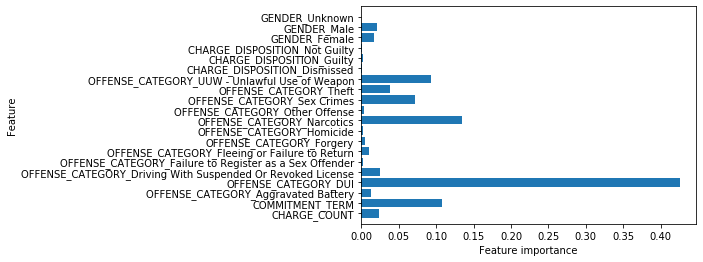

In [82]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

features = s.columns
plot_feature_importances(rf, len(features), features)

#### Based on the analysis, the Random Forest Classifier with the most optimized parameters generates a 69% accuracy in correctly classifying the data. This is not significantly different from the regular decision tree classifier. Moreover, the most important feature in correctly classifying the data are 'OFFENSE_CATEGORY_Narcotics', 'OFFENSE_CATEGORY_DUI', and 'COMMITMENT_TERM'. Lastly, the verdict of the sentencing did not provide any discernable value in classifying the data according.